<a href="https://colab.research.google.com/github/JorgeTabera/CoderH_DataScienceI/blob/main/Proyecto%20DS_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 📊 Introducción y objetivos del proyecto
## Introducción

Este proyecto tiene como finalidad explorar y analizar un conjunto de datos sobre **aplicaciones móviles disponibles en Google Play Store**. El objetivo principal es identificar patrones de comportamiento entre las aplicaciones y generar modelos predictivos útiles para entender mejor qué características influyen en su éxito.

A lo largo del análisis, se buscará responder a las siguientes preguntas:

- ¿Qué categorías de aplicaciones son las más populares?
- ¿Influyen el tamaño, tipo (gratis o paga), y la clasificación en la cantidad de descargas?
- ¿Qué relación existe entre las calificaciones de los usuarios y el número de reseñas?
- ¿Las aplicaciones gratuitas tienden a obtener más instalaciones que las pagas?
- ¿Qué géneros están asociados con mejores valoraciones por parte del público?
- ¿Se puede predecir la cantidad de instalaciones de una app a partir de sus características?

Estas preguntas se abordarán mediante análisis exploratorio, visualizaciones y modelos predictivos, aprovechando la información disponible en el dataset de Google Play.




## Objetivo del Modelo

El objetivo del modelo es **predecir la cantidad de instalaciones** que puede alcanzar una aplicación en Google Play Store, utilizando como variables predictoras sus características disponibles: categoría, calificación, número de reseñas, tamaño, tipo (gratis o paga), precio, género, versión mínima de Android, entre otras.

Este tipo de predicción puede resultar útil para:

- Desarrolladores que deseen optimizar sus aplicaciones para alcanzar mayor visibilidad y descargas.
- Empresas que analizan tendencias del mercado móvil.
- Usuarios interesados en entender qué factores están asociados al éxito de una app.

Para lograr este objetivo, se construirán modelos supervisados de regresión y/o clasificación, según el tipo de transformación aplicada a la variable de instalaciones.


### 📱 Dataset: Aplicaciones en Google Play Store

Este dataset contiene información detallada sobre diversas aplicaciones publicadas en la plataforma Google Play. Puede ser utilizado para analizar factores asociados al éxito de una app, entender tendencias en categorías y evaluar características técnicas.

**Variables potencialmente interesantes:**

- `App`: Nombre de la app, útil para identificar y agrupar registros únicos.
- `Category`: Permite clasificar las apps por tipo (JUEGO, EDUCACIÓN, SALUD, etc.), ideal para análisis por sector.
- `Rating`: Puntuación promedio otorgada por los usuarios. Es un indicador directo de calidad o satisfacción.
- `Reviews`: Número de opiniones recibidas. Puede relacionarse con el nivel de popularidad o visibilidad.
- `Size`: Tamaño en MB/KB. Permite estudiar si las apps más livianas tienen más instalaciones.
- `Installs`: Representa cuántas veces fue descargada la app. Será la variable objetivo a predecir.
- `Type`: Define si la app es gratuita o paga. Puede influir fuertemente en la cantidad de instalaciones.
- `Price`: Precio en USD. Solo relevante para apps de pago, puede influir en las descargas.
- `Content Rating`: Público objetivo (por ejemplo, “Todos”, “Adolescentes”). Permite segmentar las apps por edad.
- `Genres`: Géneros o subcategorías asociadas. Útil para análisis de nichos específicos.
- `Last Updated`: Fecha de última modificación. Ayuda a medir mantenimiento o actualización activa.
- `Current Version`: Versión de la app. Puede indicar grado de evolución o mejoras.
- `Android Version`: Mínimo requerido para funcionar. Puede influir en el alcance del público.

Este conjunto de datos será la base para realizar análisis exploratorios, visualizaciones, y modelado predictivo sobre la popularidad y el rendimiento de las aplicaciones.


In [19]:
import pandas as pd
from google.colab import drive
import os ## cambiar directorio de drive
drive.mount('/content/drive')
os.chdir('/content/drive//MyDrive/CoderHouse/Data Science I/DataSet GooglePlayStore/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# URLs de los archivos CSV en GitHub
# url_results = 'https://raw.githubusercontent.com/JorgeTabera/CoderH_DataScienceI/main/DataSet%20Selecciones/results.csv'

In [21]:
# Cargar los archivos CSV desde Git a pd
df_GooglePlay = pd.read_csv('google_play_store_dataset.csv')
df_GooglePlay.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Convertir la columna 'Installs' a tipo string
df_GooglePlay['Installs'] = df_GooglePlay['Installs'].astype(str)

# Eliminar "+" y "," y luego convertir a numérico
df_GooglePlay['Installs'] = df_GooglePlay['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)

# Convertir la columna 'Installs' a numérico (float)
df_GooglePlay['Installs'] = pd.to_numeric(df_GooglePlay['Installs'], errors='coerce')

# Valores en rating > 5 sea NA porque Google Play solo da valores hasta 5
df_GooglePlay['Rating'] = df_GooglePlay['Rating'].apply(lambda x: x if x <= 5 else pd.NA)

#df_GooglePlay_filtered = df_GooglePlay[df_GooglePlay['App'] == 'InfantRisk Center HCP'] #Para comprobar que haya limpiado ok

In [54]:
df_GooglePlay.isnull().sum()

,0
App,0
Category,0
Rating,1475
Reviews,0
Size,0
Installs,1
Type,1
Price,1
Content Rating,1
Genres,0


### 📊 Análisis: Top 10 géneros más descargados en aplicaciones pagas

El siguiente gráfico muestra el **top 10 de géneros de aplicaciones pagas más descargadas** del dataset.

Para obtener esta visualización se filtraron las apps cuyo tipo (`Type`) es "Paid", luego se agruparon por género (`Genres`) y se sumaron las instalaciones (`Installs`) para cada uno. Finalmente, se seleccionaron los 10 géneros con mayor cantidad total de descargas.

Este análisis permite identificar **qué categorías de apps pagas resultan más atractivas para los usuarios**, lo cual puede ser útil para desarrolladores o estudios de mercado en el ámbito de las apps móviles.


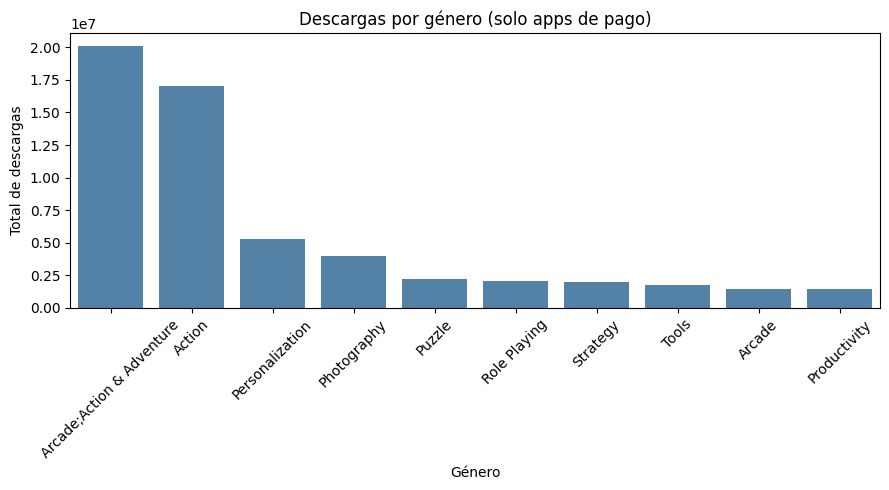

In [53]:
# Filtramos solo las apps pagas
paid_apps = df_GooglePlay[df_GooglePlay['Type'] == 'Paid']

# Agrupamos por género, sumando descargas
installs_paid_by_genre = paid_apps.groupby('Genres')['Installs'].sum().reset_index()

# Ordenamos y seleccionamos los 10 géneros más descargados
top_paid_genres = installs_paid_by_genre.sort_values(by='Installs', ascending=False).head(10)

# Gráfico
plt.figure(figsize=(9, 5))
sns.barplot(data=top_paid_genres, x='Genres', y='Installs', color='SteelBlue')
plt.xticks(rotation=45)
plt.title('Descargas por género (solo apps de pago)')
plt.xlabel('Género')
plt.ylabel('Total de descargas')
plt.tight_layout()
plt.show()